In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd

file_path = '/content/drive/MyDrive/AI/deep/second_project/train_data.csv'
df = pd.read_csv(file_path)
df.head()

<ipython-input-43-aaa47d0a5561>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


<ipython-input-44-ac555cdce178>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=df, palette='viridis')


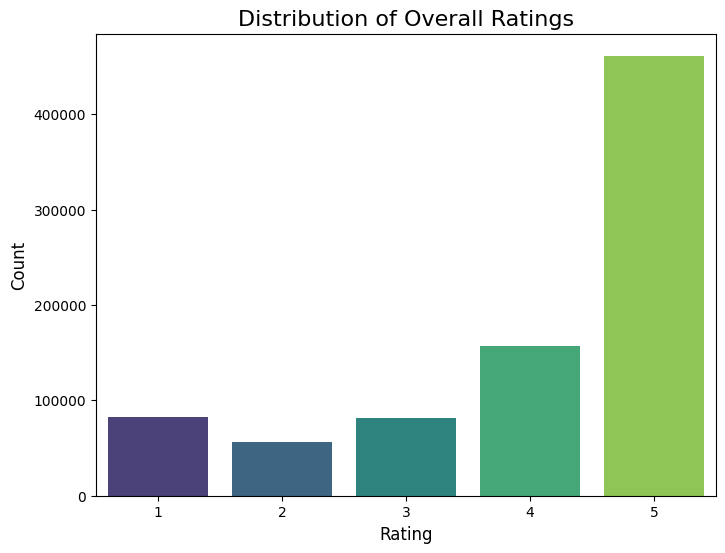

Value counts for 'overall' column:
overall
5    0.550078
4    0.186561
1    0.098874
3    0.096835
2    0.067652
Name: proportion, dtype: float64


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df, palette='viridis')
plt.title('Distribution of Overall Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

print("Value counts for 'overall' column:")
print(df['overall'].value_counts(normalize=True))


خب طبیعتا نتیجه نمودار نشون میده که مجموعه داده هامون متوازن نیتسن و نیاز داریم که متوازنش کنیم چون اگه به همین شکل باقی بمونه مدل ممکنه به سمت دسته ای که داده بیشتری داره تمایل پیدا کنه و نتایج پیش بینی نادرست باشن
اما برای متوازن کردن میتونیم چند تا راه حل رو امتحان کنیم :
1 - undersampling : بیایم تعداد نمونه های کلاس های پرجمعیت رو کمتر کنیم
2 - over sampling : بیایم  تعداد نمونه‌های کلاس‌های کم جمعیت رو با تکرار داده‌های موجود یا تولید داده‌های مصنوعی افزایش بدیم مثل روش SMOTE
3 - ترکیبی از روش های بالا :
یعنی برای کلاس های پرجمعیت از oversampling
و برای کلاس های کم چمعیت از undersampling
4 -  Class Weighting : می تونیم به جای تغییر تعداد نمونه ها حین اموزش مدل به کلاس های کم جمعیت وزن بیشتری بدیم



In [45]:


# تقسیم‌بندی نظرات به سه دسته
positive_reviews = df[df['overall'].isin([4, 5])]
neutral_reviews = df[df['overall'] == 3]
negative_reviews = df[df['overall'].isin([1, 2])]

total_reviews = len(df)
print(f"تعداد نظرات مثبت: {len(positive_reviews)} ({len(positive_reviews) / total_reviews * 100:.2f}%)")
print(f"تعداد نظرات خنثی: {len(neutral_reviews)} ({len(neutral_reviews) / total_reviews * 100:.2f}%)")
print(f"تعداد نظرات منفی: {len(negative_reviews)} ({len(negative_reviews) / total_reviews * 100:.2f}%)")


تعداد نظرات مثبت: 617999 (73.66%)
تعداد نظرات خنثی: 81239 (9.68%)
تعداد نظرات منفی: 139706 (16.65%)


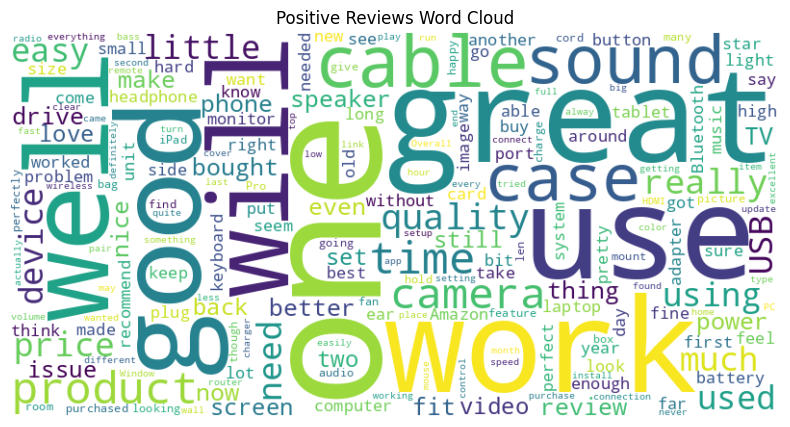

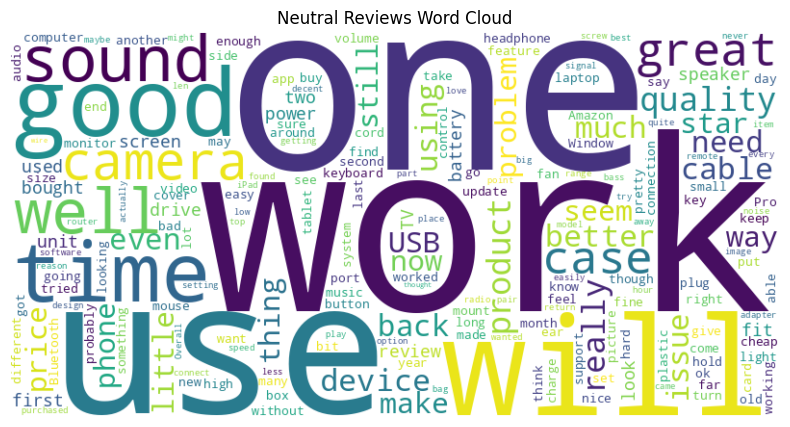

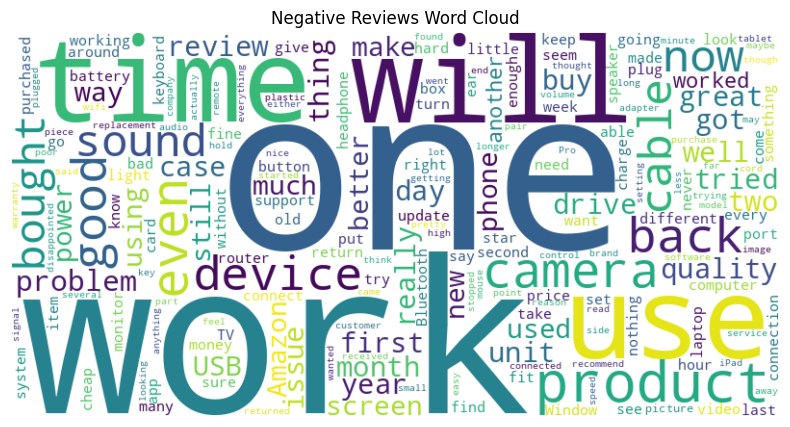

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# تابع رسم ابر کلمات
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=STOPWORDS, collocations=False).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# متن برای هر دسته
positive_text = ' '.join(positive_reviews['reviewText'])
neutral_text = ' '.join(neutral_reviews['reviewText'])
negative_text = ' '.join(negative_reviews['reviewText'])

# رسم ابر کلمات برای هر دسته
plot_wordcloud(positive_text, 'Positive Reviews Word Cloud')
plot_wordcloud(neutral_text, 'Neutral Reviews Word Cloud')
plot_wordcloud(negative_text, 'Negative Reviews Word Cloud')


In [47]:
# مجموعه‌ای از کلمات یکتا برای هر دسته
positive_words = set(positive_text.split())
negative_words = set(negative_text.split())

# پیدا کردن کلمات مشترک
common_words = positive_words.intersection(negative_words)

print("کلمات مشترک بین دسته‌های مثبت و منفی:")
print(common_words)
print(f"تعداد کلمات مشترک: {len(common_words)}")



کلمات مشترک بین دسته‌های مثبت و منفی:
{'cr@p.', 'Ofcourse,', 'enthusiastic', 'Asmedia', 'lengthen', 'thing!)', 'lamented', 'next-day', 'SL-1102A', 'Member.', 'analog-style', 'box--or', 'firmware..', '(south', 'specimens', 'KPCC', 'fronts,', 'icons.', 'fine...however,', 'Monster.', 'Incorrectly', 'name-brand', 'Sport.', 'upgrade:', 'excitement.', 'pinch-type', '(leave', 'AC-class', 'PALM', 'Verbatim.', 'P2,', 'camera/camcorder', 'newest', 'PC",', 'slope.', 'santa', 'usbC', 'Oring', "chip's", 'rots', 'mountains', 'account).', 'FLORIDA', "Kevin's", '4.1GHz', 'this..but', 'art!', '11/24', 'Marco', '000', 'Superficially,', 'Amazone', 'walls', 'Whatevs.', '"adjust', 'K-30X', 'FRONT-FACING', 'GOLZER', 'on!!!!', '9am-9pm', 'Kidde', 'Fiddled', 'electronix', 'feels.', '11hrs', 'moldings', 'shout-out', 'days', 'tension,', '"goodbye"', 'point;', 'Game,', 'SWK-W16', '(Time', 'SM-T810.', 'iv', 'slingshot.', 'ssh', 'BACKLIT', 'Cu', '"hangs"', 'stuffy', 'sanded,', '(MTX', 'Allwinner,', 'rattly,', '"E.

In [48]:
print(df['vote'].dtype)
print(df['vote'].unique())

# حذف فاصله‌ها و کاماها، سپس تبدیل به نوع عددی
df['vote'] = df['vote'].replace({' ': '', ',': ''}, regex=True)
df['vote'] = pd.to_numeric(df['vote'], errors='coerce')

# جایگزینی مقادیر NaN با 0
df['vote'] = df['vote'].fillna(0)



object
[nan 4.0 2.0 10.0 3.0 5.0 7.0 14.0 6.0 11.0 58.0 8.0 16.0 9.0 12.0 22.0
 15.0 13.0 128.0 47.0 20.0 35.0 18.0 19.0 46.0 23.0 164.0 28.0 27.0 244.0
 17.0 48.0 21.0 45.0 36.0 43.0 80.0 61.0 39.0 91.0 161.0 26.0 135.0 117.0
 70.0 49.0 83.0 30.0 96.0 25.0 38.0 142.0 159.0 270.0 54.0 240.0 31.0 74.0
 125.0 60.0 69.0 199.0 90.0 33.0 382.0 56.0 24.0 42.0 283.0 138.0 50.0
 139.0 29.0 231.0 107.0 41.0 32.0 51.0 34.0 52.0 442.0 248.0 67.0 71.0
 84.0 37.0 111.0 44.0 55.0 40.0 62.0 65.0 205.0 320.0 124.0 75.0 152.0
 63.0 72.0 95.0 68.0 64.0 180.0 86.0 53.0 112.0 101.0 105.0 88.0 184.0
 145.0 173.0 335.0 156.0 110.0 92.0 82.0 106.0 174.0 85.0 187.0 66.0 172.0
 76.0 131.0 384.0 57.0 595.0 108.0 331.0 241.0 115.0 178.0 136.0 394.0
 313.0 269.0 59.0 77.0 127.0 169.0 322.0 134.0 200.0 141.0 104.0 99.0
 334.0 465.0 100.0 73.0 529.0 196.0 190.0 225.0 923.0 87.0 103.0 123.0
 97.0 176.0 236.0 267.0 79.0 303.0 319.0 441.0 129.0 272.0 332.0 93.0
 204.0 126.0 318.0 920.0 130.0 177.0 171.0 119.0 216.0 16

In [60]:
import pandas as pd
from tabulate import tabulate

# محاسبه مجموع نظرات هر نظر دهنده
top_reviewers = df.groupby(['reviewerID', 'reviewerName'])['vote'].sum().reset_index()

# مرتب‌سازی نزولی
top_reviewers = top_reviewers.sort_values(by='vote', ascending=False)

top_10_reviewers = top_reviewers.head(10)
print(tabulate(top_10_reviewers, headers='keys', tablefmt='pretty'))


+--------+----------------+---------------+--------+
|        |   reviewerID   | reviewerName  |  vote  |
+--------+----------------+---------------+--------+
| 98734  | A25GROL6KJV3QG | Benson Leung  | 4572.0 |
| 220238 | A3KJ0DF3LTNJ6X |  Voltron00x   | 3181.0 |
| 129947 | A2IK776FY6MEMG |    Obi Wan    | 3150.0 |
| 49214  | A1KPFZCS71QKW5 |    nycebo     | 2978.0 |
| 293333 | AMYCUX8EWEUVV  |   Mayra S.    | 2631.0 |
| 271095 |  ADLVFFE4VBT8  |    Cthulhu    | 2607.0 |
| 39282  | A1GHPJB2N0D0RL |  Chris Upton  | 2167.0 |
| 315384 | AW7UMXXJKFSNS  |   Sally B.    | 1912.0 |
| 179190 | A33AN9NP6574M2 |      DJ       | 1867.0 |
| 161044 | A2VQ0V1TWXF3U7 | Mark A. Baker | 1820.0 |
+--------+----------------+---------------+--------+


In [50]:
# محاسبه طول متن reviewText
df['reviewLength'] = df['reviewText'].str.len()
print(df['reviewLength'].describe())


count    838944.000000
mean        624.687384
std         684.129474
min         200.000000
25%         277.000000
50%         408.000000
75%         697.000000
max       29146.000000
Name: reviewLength, dtype: float64


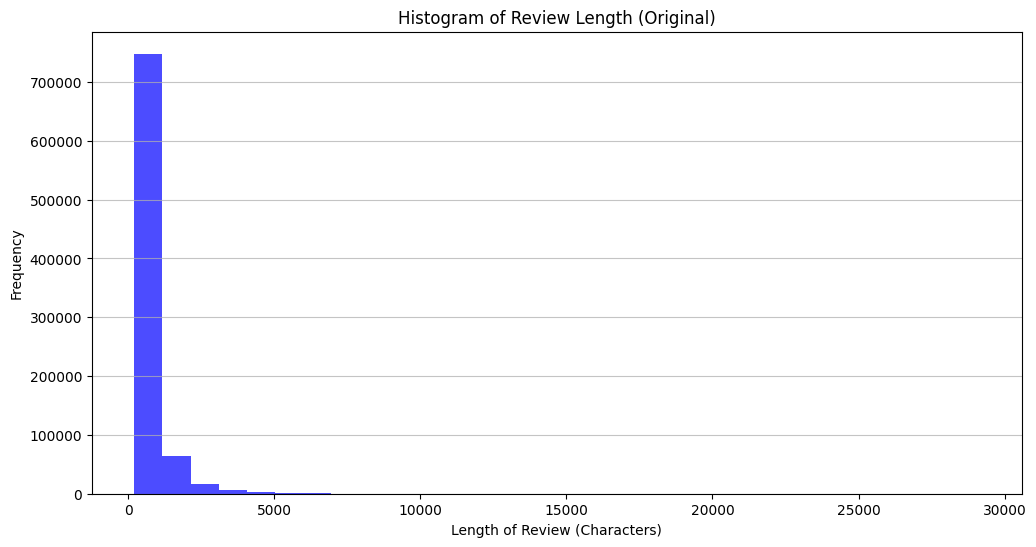

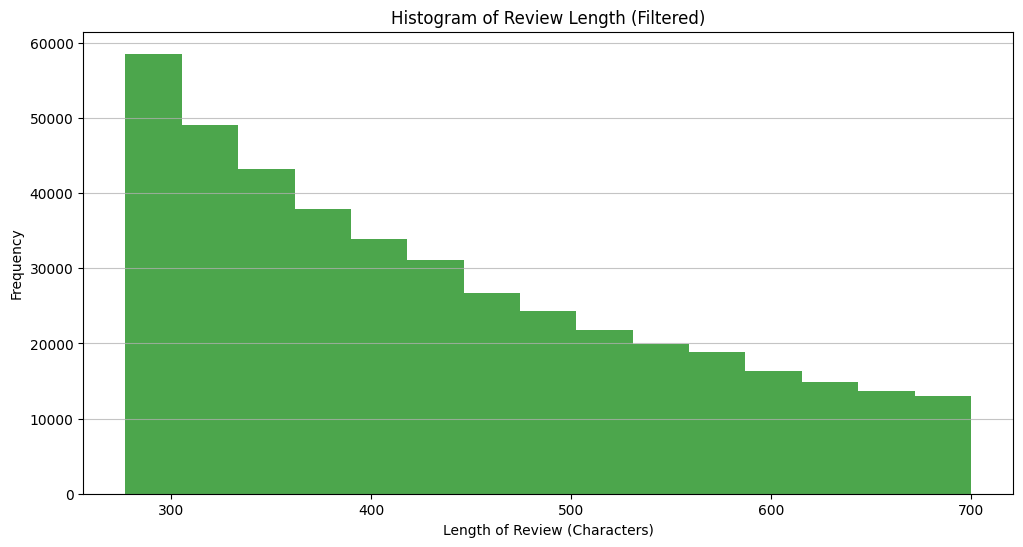

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# حالت اصلی
plt.figure(figsize=(12, 6))
plt.hist(df['reviewLength'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Review Length (Original)')
plt.xlabel('Length of Review (Characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# فیلتر کردن نظرات
filtered_df = df[(df['reviewLength'] >= 277) & (df['reviewLength'] <= 700)]

# حالت فیلتر شده
plt.figure(figsize=(12, 6))
plt.hist(filtered_df['reviewLength'], bins=15, color='green', alpha=0.7)
plt.title('Histogram of Review Length (Filtered)')
plt.xlabel('Length of Review (Characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


بله محدود سازی کاراکتر ها ضرویه چون باعث کاهش نویز و افزایش کیفیت داده ها و در نتیجه بهبود کیفیت مدل میشه.
بر اساس توزیع طول نظرات و تحلیل آماری انجام شده،جهت محدود سازی چارک های اول و سوم رو به عنوان نقاط مرزی تعیین کردم.

In [52]:
file_path = '/content/drive/MyDrive/AI/deep/second_project/title_brand.csv'

product_mapping = pd.read_csv(file_path)

print(product_mapping.head())


         asin                                              title  \
0  0011300000  Genuine Geovision 1 Channel 3rd Party NVR IP S...   
1  0043396828  Books "Handbook of Astronomical Image Processi...   
2  0060009810                                     One Hot Summer   
3  0060219602  Hurray for Hattie Rabbit: Story and pictures (...   
4  0060786817                     sex.lies.murder.fame.: A Novel   

                                          brand  
0                                     GeoVision  
1                                  33 Books Co.  
2  Visit Amazon's Carolina Garcia Aguilera Page  
3           Visit Amazon's Dick Gackenbach Page  
4              Visit Amazon's Lolita Files Page  


+--------+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|        |         brand          |                                                                                                       title                                                                                                        | num_reviews_5_star |
+--------+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
| 550168 |  Cambridge Soundworks  |                 OontZ Angle 3 Enhanced Stereo Edition IPX5 Splashproof Portable Bluetooth Speaker with Volume Booster AMP 10 Watts Power, Custom Bass Radi

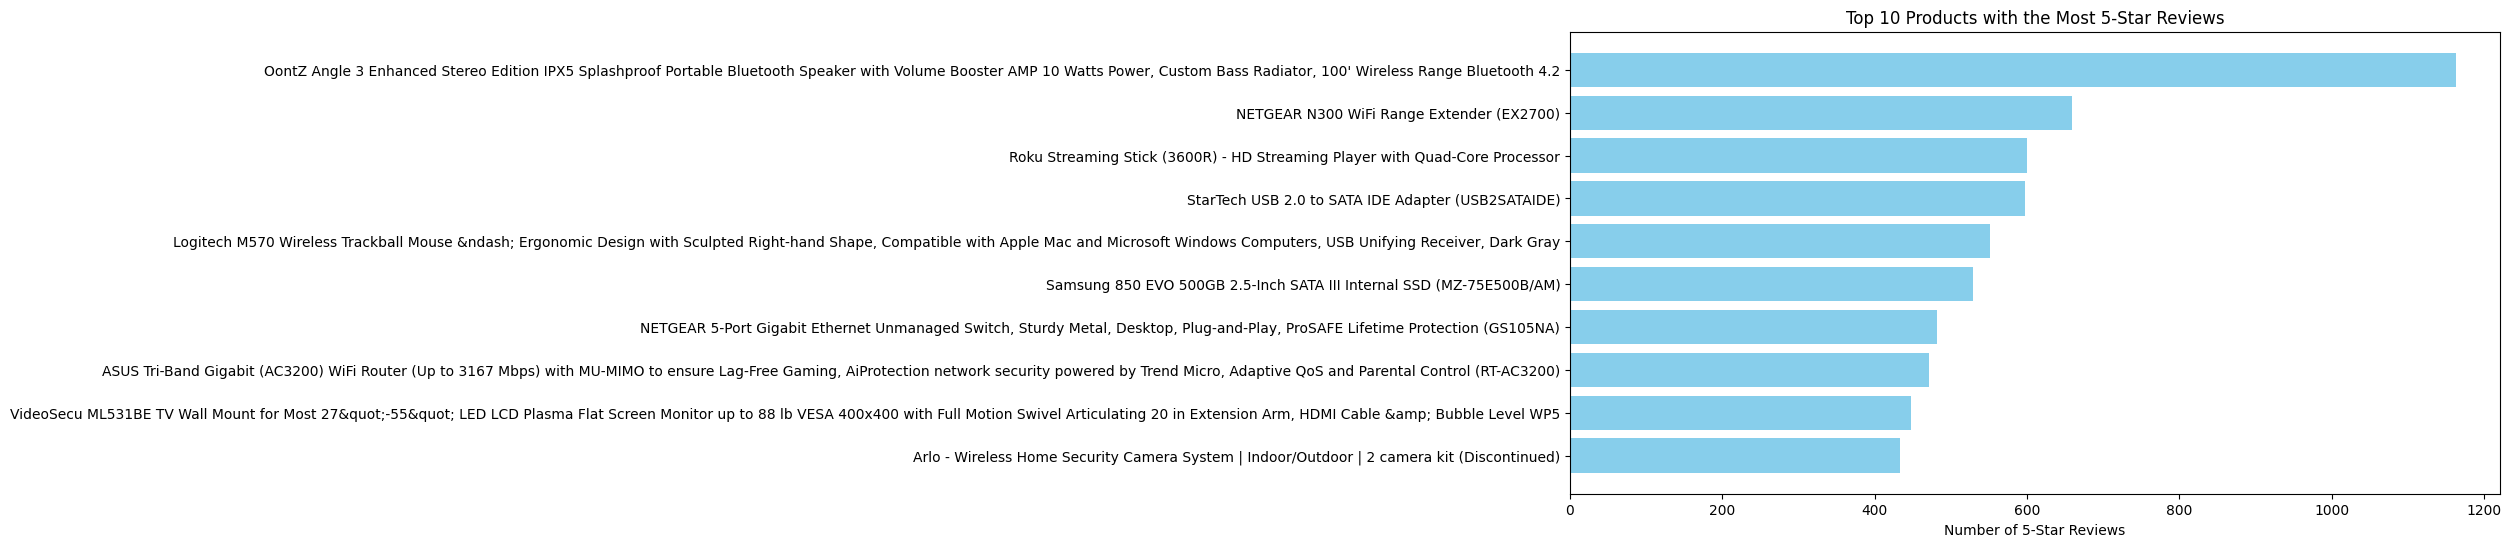

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

merged_df = pd.merge(df, product_mapping, on='asin')
df_5_star = merged_df[merged_df['overall'] == 5]
top_products_5_star = df_5_star.groupby('asin').size().reset_index(name='num_reviews_5_star')
top_products_5_star = pd.merge(top_products_5_star, merged_df[['asin', 'brand', 'title']], on='asin').drop_duplicates()
top_10_products = top_products_5_star.sort_values(by='num_reviews_5_star', ascending=False).head(10)
print(tabulate(top_10_products[['brand', 'title', 'num_reviews_5_star']], headers='keys', tablefmt='pretty'))

plt.figure(figsize=(12, 6))
plt.barh(top_10_products['title'], top_10_products['num_reviews_5_star'], color='skyblue')
plt.xlabel('Number of 5-Star Reviews')
plt.title('Top 10 Products with the Most 5-Star Reviews')
plt.gca().invert_yaxis()
plt.show()


+---+--------------+--------------------+
|   |    brand     |     avg_rating     |
+---+--------------+--------------------+
| 5 |    Anker     | 4.244320486815416  |
| 2 | AmazonBasics | 4.201468250964958  |
| 8 |   Sabrent    | 4.0280054644808745 |
| 7 |   SanDisk    | 3.958809523809524  |
| 0 |   Logitech   | 3.9540607054963086 |
| 1 |   Samsung    | 3.9412680900772274 |
| 3 |     Sony     | 3.9387262785461563 |
| 6 |   TP-LINK    |  3.92868106006344  |
| 4 |     Asus     | 3.8555499664654596 |
| 9 |   NETGEAR    | 3.836273817925194  |
+---+--------------+--------------------+


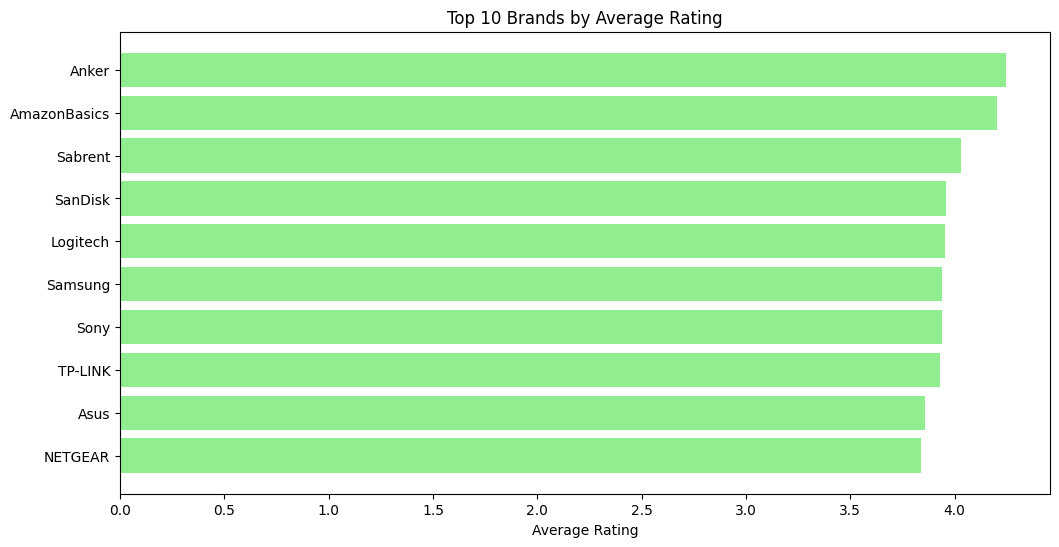

In [59]:
merged_df = pd.merge(df, product_mapping, on='asin')
brand_review_count = merged_df.groupby('brand').size().reset_index(name='review_count')
top_10_brands = brand_review_count.nlargest(10, 'review_count')
brand_avg_rating = merged_df.groupby('brand')['overall'].mean().reset_index(name='avg_rating')
top_10_brands_avg = pd.merge(top_10_brands, brand_avg_rating, on='brand')
top_10_brands_avg_sorted = top_10_brands_avg.sort_values(by='avg_rating', ascending=False)
print(tabulate(top_10_brands_avg_sorted[['brand', 'avg_rating']], headers='keys', tablefmt='pretty'))

plt.figure(figsize=(12, 6))
plt.barh(top_10_brands_avg_sorted['brand'], top_10_brands_avg_sorted['avg_rating'], color='lightgreen')
plt.xlabel('Average Rating')
plt.title('Top 10 Brands by Average Rating')
plt.gca().invert_yaxis()
plt.show()
